In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import kron, csc_matrix, eye
from GSKL_Exact_Funcs import *

In [11]:
N = 4

s0, sx, sy, sz, sp, sm = Pauli(N)

Nt = 5000
dt = 0.01
gammas = np.array([0.5, 0.5])
fs = np.array([1, 0])

H = hamiltonian(N, 1, 1, s0, sx, sy, sz)

#rho0 = eye(m = H.shape[0], dtype = complex, format = 'csc')#/len(H)#density_matrix([0.5, 0.5], [[0, 1, 0, 0], [0, 0, 1, 0]])
rho0 = np.eye(len(H), dtype = complex)/len(H)
localmag = np.zeros(N, dtype = complex)

obs_op = []
for i in range(N):
  sztot = create_string(N, i, sz, s0)
  obs_op.append(sztot)

op01 = create_string(N, 0, sm, s0)
op02 = create_string(N, 0, sp, s0)

op11 = create_string(N, N-1, sm, s0)
op12 = create_string(N, N-1, sp, s0)

op_dis = [op01, op02, op11, op12]

Rodou 2090 iteracoes de tempo.
0
Rodou 2090 iteracoes de tempo.
1
Rodou 2090 iteracoes de tempo.
2
Rodou 2090 iteracoes de tempo.
3


/home/luan/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


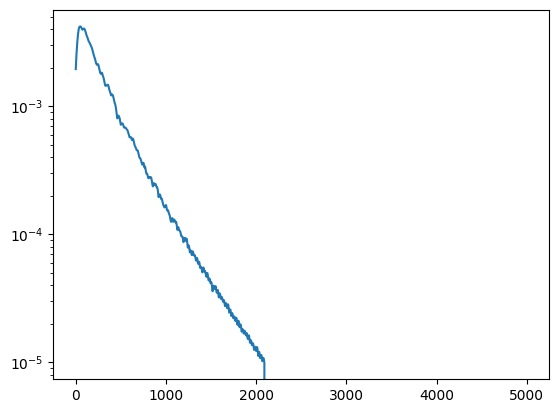

In [15]:
for i in range(N):
     #+ create_string(N, 1, sz)
    rho_trace, Opmean, Liouv = time_evolution2(N, Nt, dt, H, rho0, gammas, fs, op_dis, obs_op[i], 1e-5)
    #local_current_op = 2*1*(create_string(N, i, sx)@create_string(N, i+1, sy) - create_string(N, i, sy)@create_string(N, i+1, sx))

    localmag[i] = Opmean[-1]
    print(i)

#plt.plot(np.real(localmag), '-o')
plt.semilogy(Liouv)